In [13]:
import spacy
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from keybert import KeyBERT
from collections import Counter
from collections import defaultdict
from transformers import pipeline
import pycountry

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Loading the documents
with open("outputs/docs.txt", "r", encoding = "utf-8") as f:
    docs = f.read().split("\n\n")

print(f"loaded {len(docs)} documents")

loaded 97 documents


In [15]:
# Extracting key themes
kw_model = KeyBERT(model = 'all-MiniLM-L6-v2')
keywords = kw_model.extract_keywords(docs[0], top_n=20)
print("Raw keywords", keywords)

# Lemmatizing keywords using spaCy
lemmatized_scores = Counter()
for word, score in keywords:
    lemma = nlp(word)[0].lemma_
    lemmatized_scores[lemma]+=score

grouped_keywords = lemmatized_scores.most_common()
print("Grouped keywords", grouped_keywords)


Raw keywords [('funding', 0.3902), ('financing', 0.3409), ('capabilities', 0.3283), ('international', 0.3131), ('finance', 0.3106), ('development', 0.3098), ('banks', 0.3035), ('funds', 0.3025), ('proposals', 0.2998), ('bank', 0.2981), ('sustainability', 0.298), ('currencies', 0.2928), ('financial', 0.2897), ('fund', 0.2771), ('reserve', 0.27), ('developing', 0.27), ('institutions', 0.2691), ('sdrs', 0.2684), ('sustainable', 0.2667), ('monetary', 0.2663)]
Grouped keywords [('fund', 0.9698), ('bank', 0.6015999999999999), ('financing', 0.3409), ('capability', 0.3283), ('international', 0.3131), ('finance', 0.3106), ('development', 0.3098), ('proposal', 0.2998), ('sustainability', 0.298), ('currency', 0.2928), ('financial', 0.2897), ('reserve', 0.27), ('develop', 0.27), ('institution', 0.2691), ('sdr', 0.2684), ('sustainable', 0.2667), ('monetary', 0.2663)]


In [16]:
# Named Entity Recognition (NER) to identify Country mentions
from fuzzywuzzy import process

nlp = spacy.load("en_core_web_sm")
country_cnt = Counter()
country_list = [country.name for country in pycountry.countries]

for doc in docs:
    parsed = nlp(doc)
    for ent in parsed.ents:
        if ent.label_ == "GPE":
            candidate = ent.text.strip()
            match, score = process.extractOne(candidate, country_list)
            if score >=90:
                country_cnt[match]+=1
            #if candidate in country_names:
             #   country_cnt[candidate]+=1

            #country_cnt[ent.text.strip()]+=1

cnt = country_cnt.most_common(10)
print(cnt)


[('Azerbaijan', 69), ('Australia', 46), ('Palestine, State of', 41), ('Ukraine', 36), ('France', 33), ('Micronesia, Federated States of', 30), ('China', 25), ('Netherlands', 24), ('Spain', 22), ('Portugal', 20)]


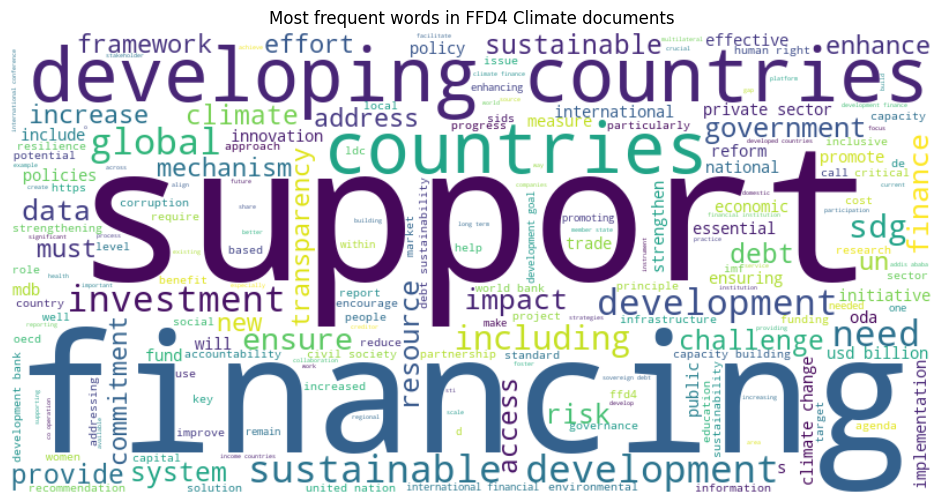

In [17]:
# Word Cloud of frequent phrases
all_text = " ".join(docs).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in FFD4 Climate documents")
plt.show()

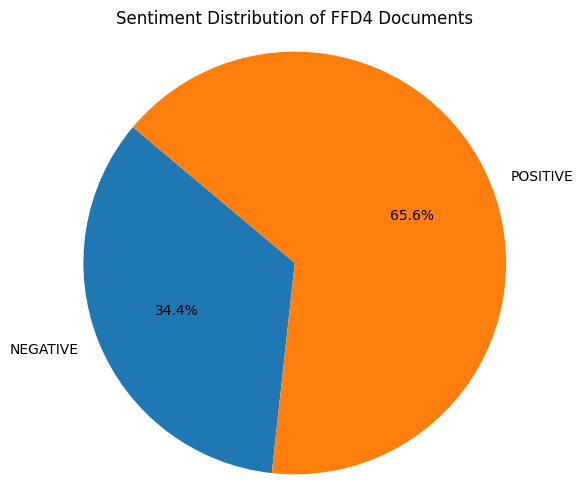

[('POSITIVE', 63), ('NEGATIVE', 33)]


In [19]:
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt

sentiment_counts = Counter()
for doc in docs:
    if len(doc.strip()) <10:
        continue
    result = sentiment_model(doc[:512])[0]
    sentiment_counts[result['label']]+=1

labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle=140)
plt.title("Sentiment Distribution of FFD4 Documents")
plt.axis('equal')
plt.show()
print(sentiment_counts.most_common())

Found 39 documents about climate funding
Climate Funding sentiment counts Counter({'POSITIVE': 25, 'NEGATIVE': 14})


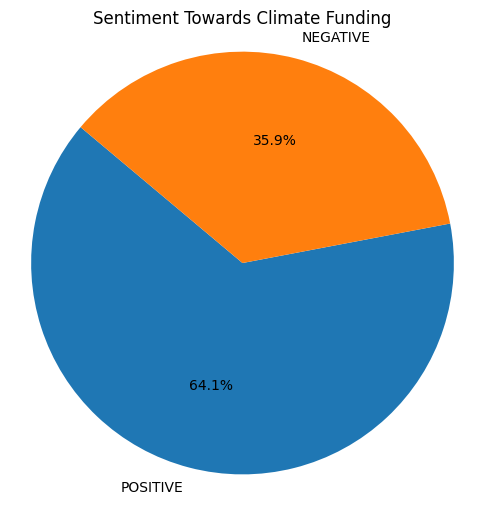

In [20]:
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt

climate_docs = [doc for doc in docs if "climate finance" in doc.lower() or "climate funding" in doc.lower()]
print(f"Found {len(climate_docs)} documents about climate funding")

c_sentiment_counts = Counter()
for doc in climate_docs:
    if len(doc.strip()) <10:
        continue
    result = sentiment_model(doc[:512])[0]
    c_sentiment_counts[result['label']]+=1

print("Climate Funding sentiment counts", c_sentiment_counts)

labels = list(c_sentiment_counts.keys())
sizes = list(c_sentiment_counts.values())
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle=140)
plt.title("Sentiment Towards Climate Funding")
plt.axis('equal')
plt.show()
